<font size="5" color="#FF5733">Importing Modules</font>

In [40]:
import pandas as pd
import seaborn as sns

<font size="5" color="#FF5733">Reading File</font>

In [41]:
df = pd.read_csv("Store Sales Data.csv", encoding = 'unicode_escape') #reading the .csv file
#to avoid encoding errors, use 'unicode_escape'

<font size="5" color="#FF5733">Data Cleaning</font>

In [42]:
df.shape

(11251, 15)

In [43]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [45]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [46]:
pd.isnull(df).sum() #to discover the null values col wise

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [47]:
df.dropna(inplace = True) #to remove the rows having null values in any of the columns

In [48]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [49]:
df['Amount']=df['Amount'].astype("int")

In [50]:
df['Amount'].dtypes

dtype('int64')

In [51]:
df.rename(columns = {'Age Group':'Age_Group'},inplace = True)

In [52]:
df['Marital_Status'] = df['Marital_Status'].replace({0:'Married',1:'UnMarried'})

In [53]:
df['Gender'] = df['Gender'].replace({'M':'Male','F':'Female'})

In [54]:
df.describe()

,User_ID,Age,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,2.489634,9453.610553
std,1.716039e+03,12.753866,1.114967,5222.355168
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,4.000000,23952.000000


<font size="5" color="#FF5733">Exploratory Data Analysis</font>

<font size="5" color="pink">Gender</font>

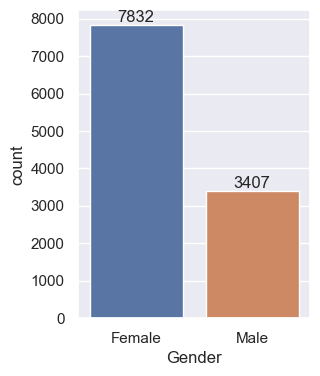

In [55]:
sns.set(rc={'figure.figsize':(3,4)})
ax = sns.countplot(x="Gender",data=df,hue="Gender",legend=False)
for bars in ax.containers:
    ax.bar_label(bars)

In [56]:
sales_Gender = df.groupby(['Gender'],as_index=False)['Amount'].sum()
sales_Gender

,Gender,Amount
0,Female,74335853
1,Male,31913276


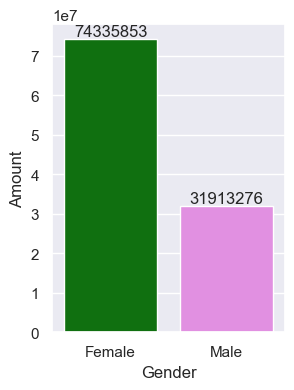

In [57]:
sns.set(rc={'figure.figsize':(3,4)})
ax = sns.barplot(x='Gender',y='Amount',data=sales_Gender,hue = 'Gender',legend=False,palette=["green","violet"])
for bars in ax.containers:
    ax.bar_label(bars,labels=[f'{int(v.get_height())}' for v in bars])

<font size="5" color="pink">Age Group</font>

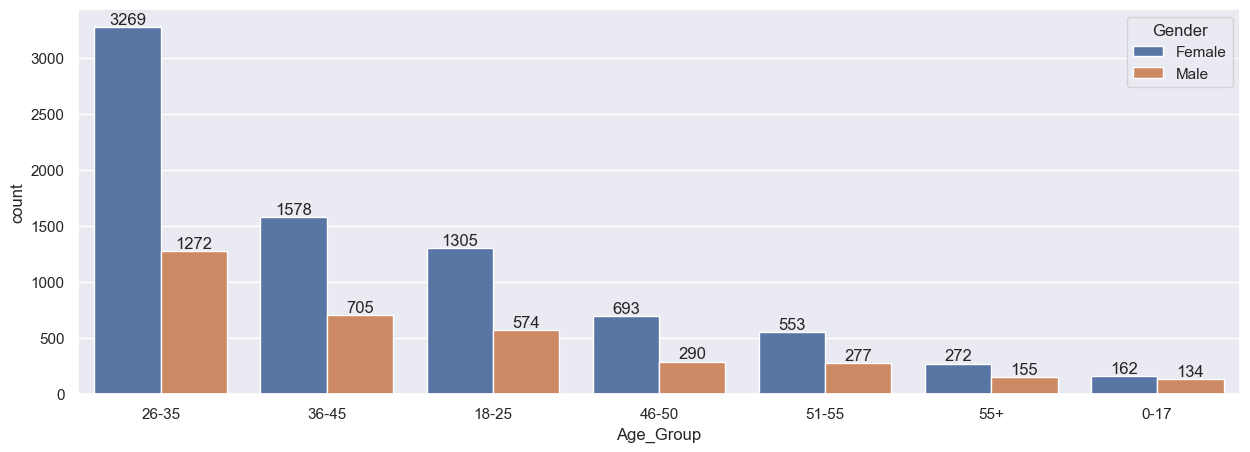

In [58]:
sns.set(rc={'figure.figsize':(15,5)})
AgeGrp_Count = df['Age_Group'].value_counts()
Sorted_AgeGrps = AgeGrp_Count.index
bx = sns.countplot(x='Age_Group',order=Sorted_AgeGrps,data = df,hue='Gender')
for bars in bx.containers:
    bx.bar_label(bars)

In [59]:
sales_Age = df.groupby(['Age_Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_Age

,Age_Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


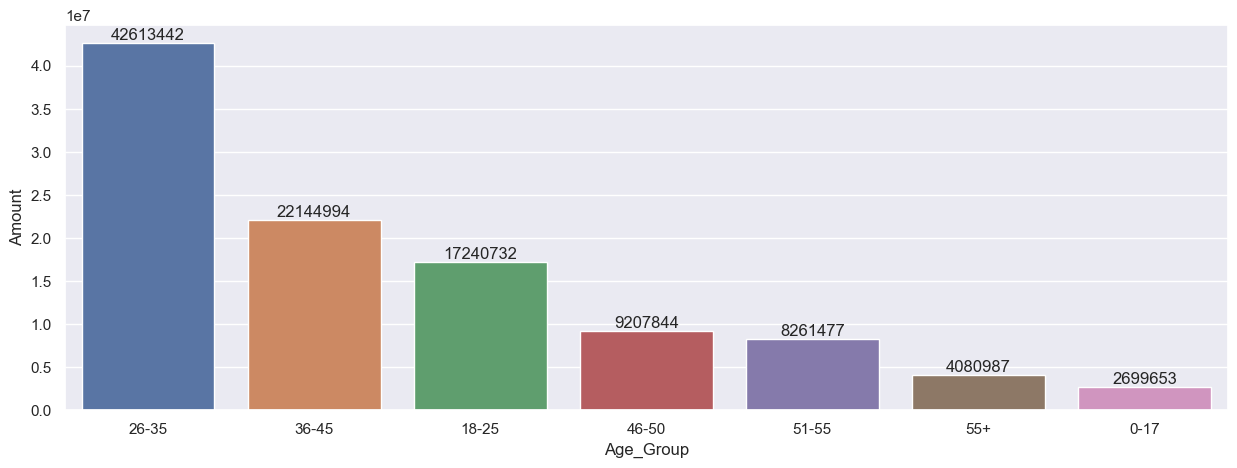

In [60]:
bx=sns.barplot(x='Age_Group',y='Amount',data=sales_Age,hue='Age_Group')
for bars in bx.containers:
    bx.bar_label(bars,labels=[f'{int(v.get_height())}' for v in bars])

<font size="5" color="pink">State</font>

In [61]:
states_count = df['State'].value_counts()
sorted_states = states_count.index

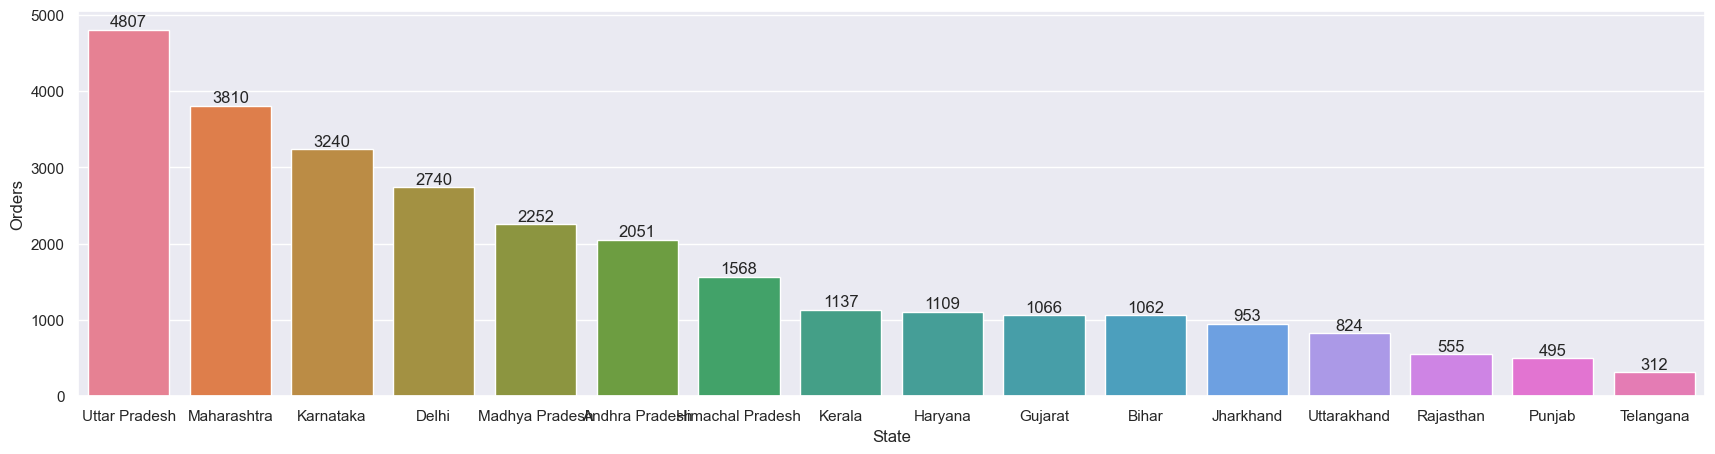

In [62]:
sns.set(rc={'figure.figsize':(21,5)})
Orders_States=df.groupby('State',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
cx=sns.barplot(x='State',y='Orders',data=Orders_States,hue='State')
for bars in cx.containers:
    cx.bar_label(bars)

In [63]:
sales_state = df.groupby('State',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


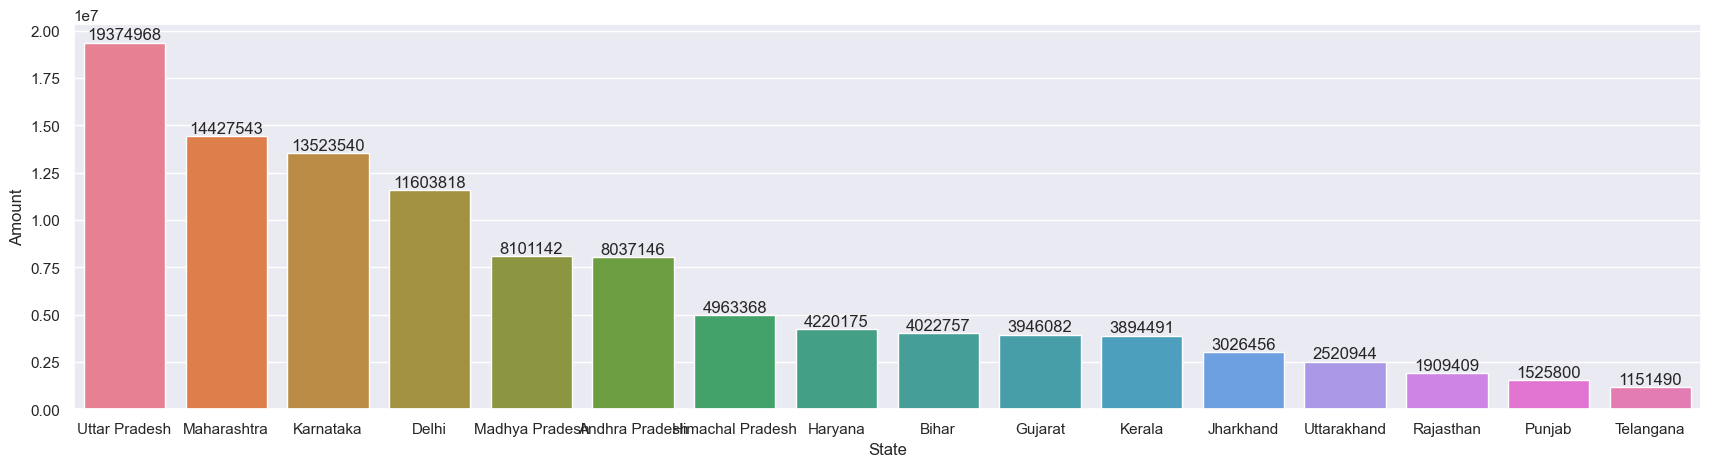

In [64]:
dx=sns.barplot(x='State',y='Amount',data=sales_state,hue='State')
for bars in dx.containers:
    dx.bar_label(bars,labels=[f'{int(v.get_height())}'for v in bars])

<font size="5" color="pink">Marital Status</font>

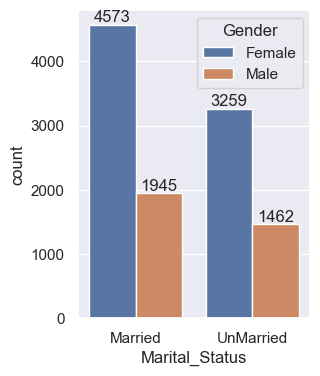

In [65]:
sns.set(rc={'figure.figsize':(3,4)})
Mstatus_count = df['Marital_Status'].value_counts()
sorted_Mstatus = Mstatus_count.index
ex = sns.countplot(x='Marital_Status',order=sorted_Mstatus,data = df,hue='Gender')
for bars in ex.containers:
    ex.bar_label(bars)

In [66]:
sales_Mstatus = df.groupby(['Marital_Status'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_Mstatus

,Marital_Status,Amount
0,Married,62125384
1,UnMarried,44123745


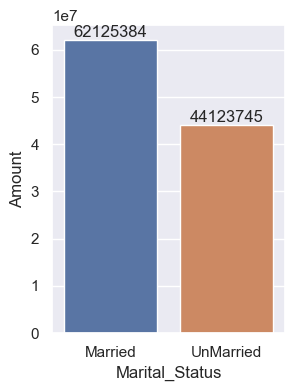

In [67]:
sns.set(rc={'figure.figsize':(3,4)})
ex=sns.barplot(x='Marital_Status',y='Amount',data=sales_Mstatus,hue = 'Marital_Status')
for bars in ex.containers:
    ex.bar_label(bars,labels=[f'{int(v.get_height())}'for v in bars])

<font size="5" color="pink">Occupation</font>

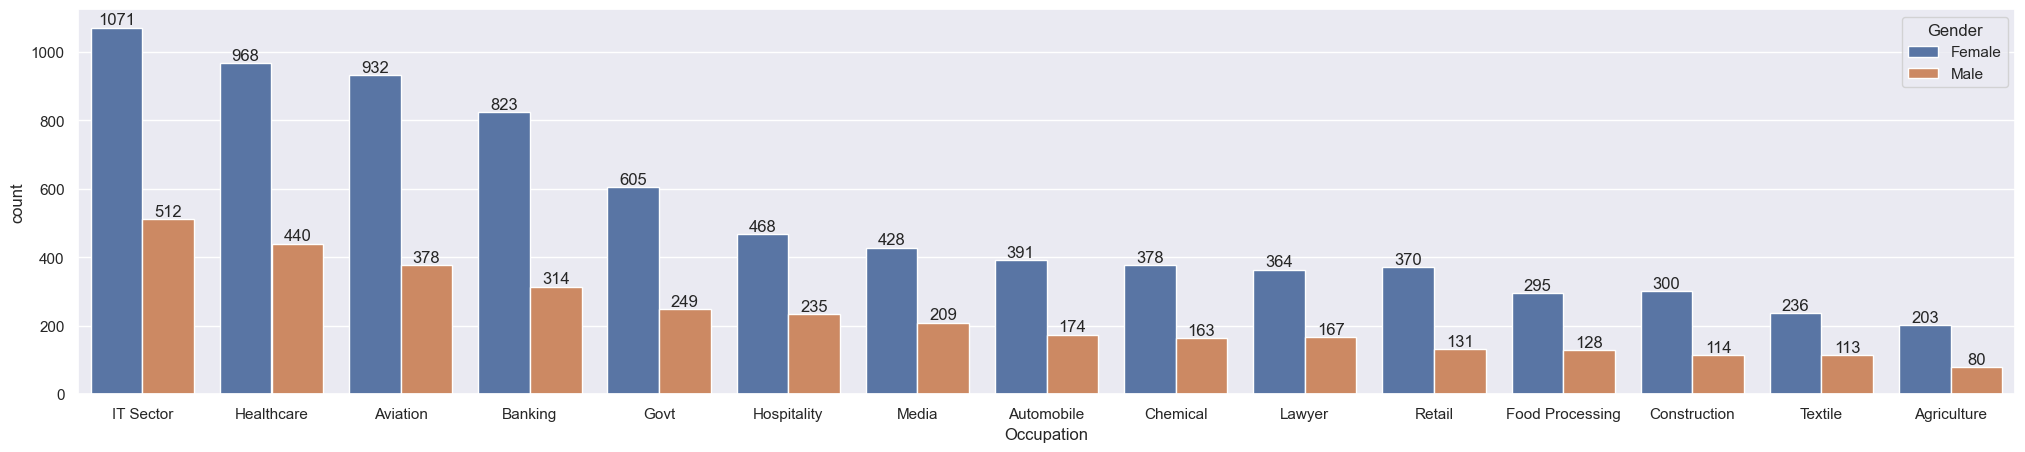

In [68]:
sns.set(rc={'figure.figsize':(25,5)})
Occu_count = df['Occupation'].value_counts()
sorted_Occu = Occu_count.index
fx = sns.countplot(x='Occupation',order=sorted_Occu,data = df,hue='Gender')
for bars in fx.containers:
    fx.bar_label(bars)

In [69]:
sales_Occu = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_Occu

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


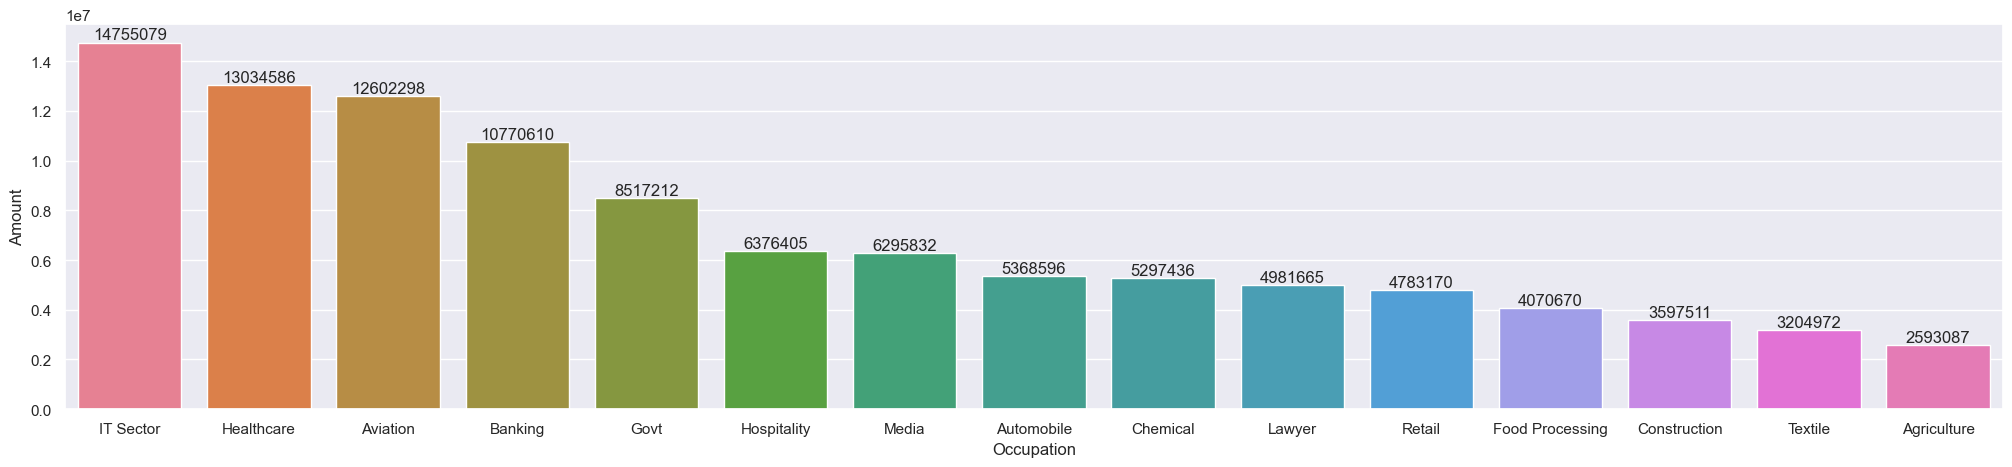

In [70]:
fx=sns.barplot(x='Occupation',y='Amount',data=sales_Occu,hue = 'Occupation')
for bars in fx.containers:
    fx.bar_label(bars,labels=[f'{int(v.get_height())}'for v in bars])

<font size="5" color="pink">Zone</font>

In [71]:
Zone_count = df['Zone'].value_counts()
sorted_Zone = Zone_count.index

In [72]:
sales_Zone = df.groupby(['Zone'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_Zone

,Zone,Amount
0,Central,41600872
3,Southern,26606667
4,Western,18373625
2,Northern,12618752
1,Eastern,7049213


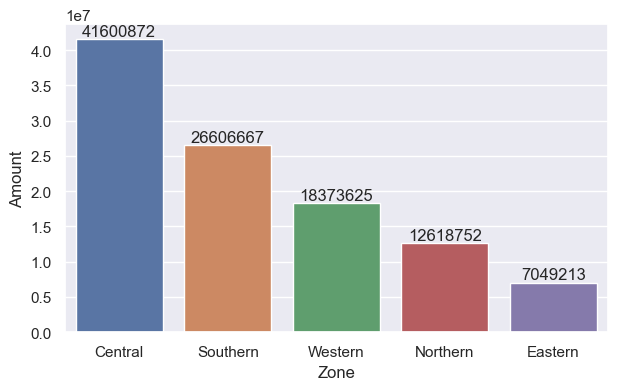

In [73]:
sns.set(rc={'figure.figsize':(7,4)})
gx=sns.barplot(x='Zone',y='Amount',data=sales_Zone,hue = 'Zone')
for bars in gx.containers:
    gx.bar_label(bars,labels=[f'{int(v.get_height())}'for v in bars])

<font size="5" color="pink">Product Category</font>

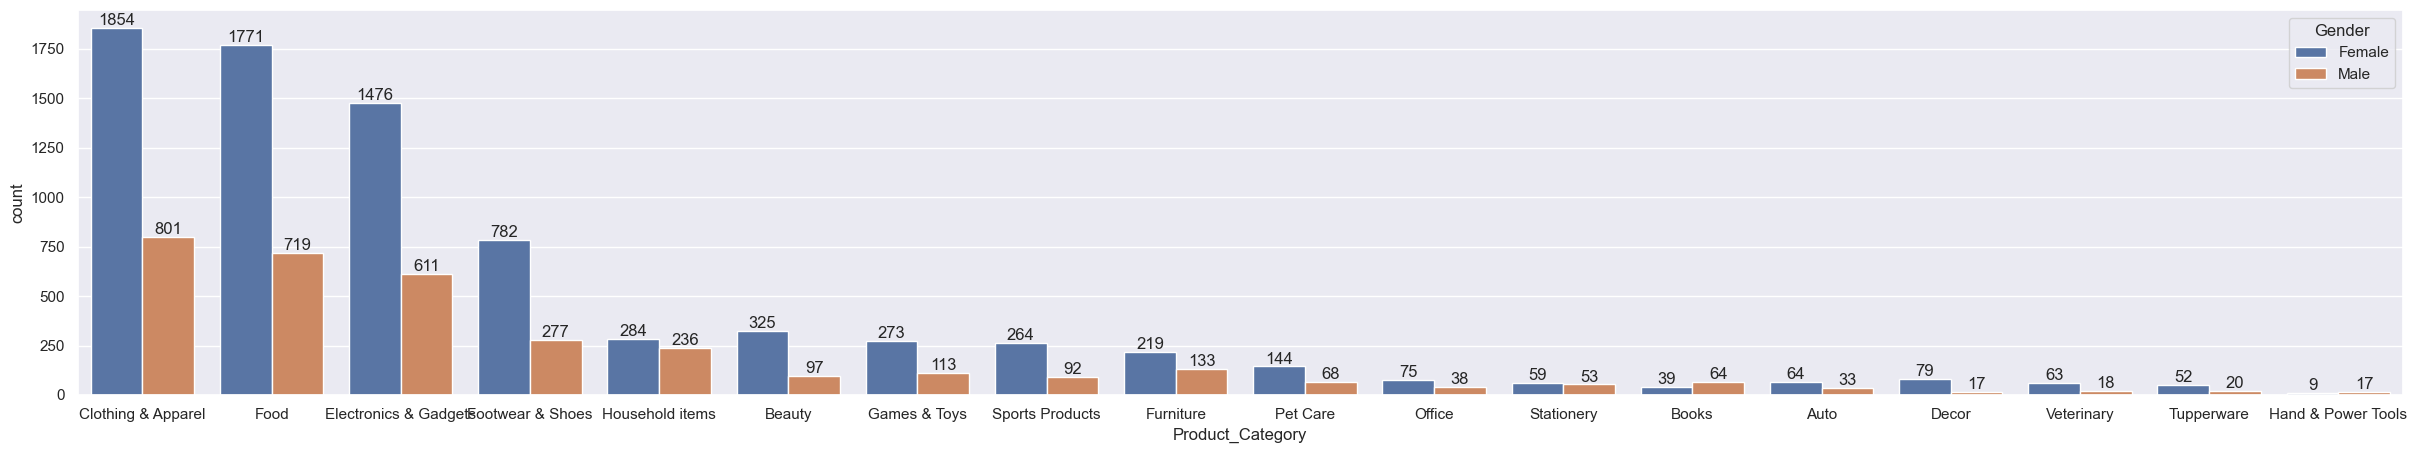

In [74]:
sns.set(rc={'figure.figsize':(30,5)})
ProCat_count = df['Product_Category'].value_counts()
sorted_ProCat = ProCat_count.index
gx = sns.countplot(x='Product_Category',order=sorted_ProCat,data = df,hue='Gender')
for bars in gx.containers:
    gx.bar_label(bars)

In [75]:
sales_ProCat = df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_ProCat

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


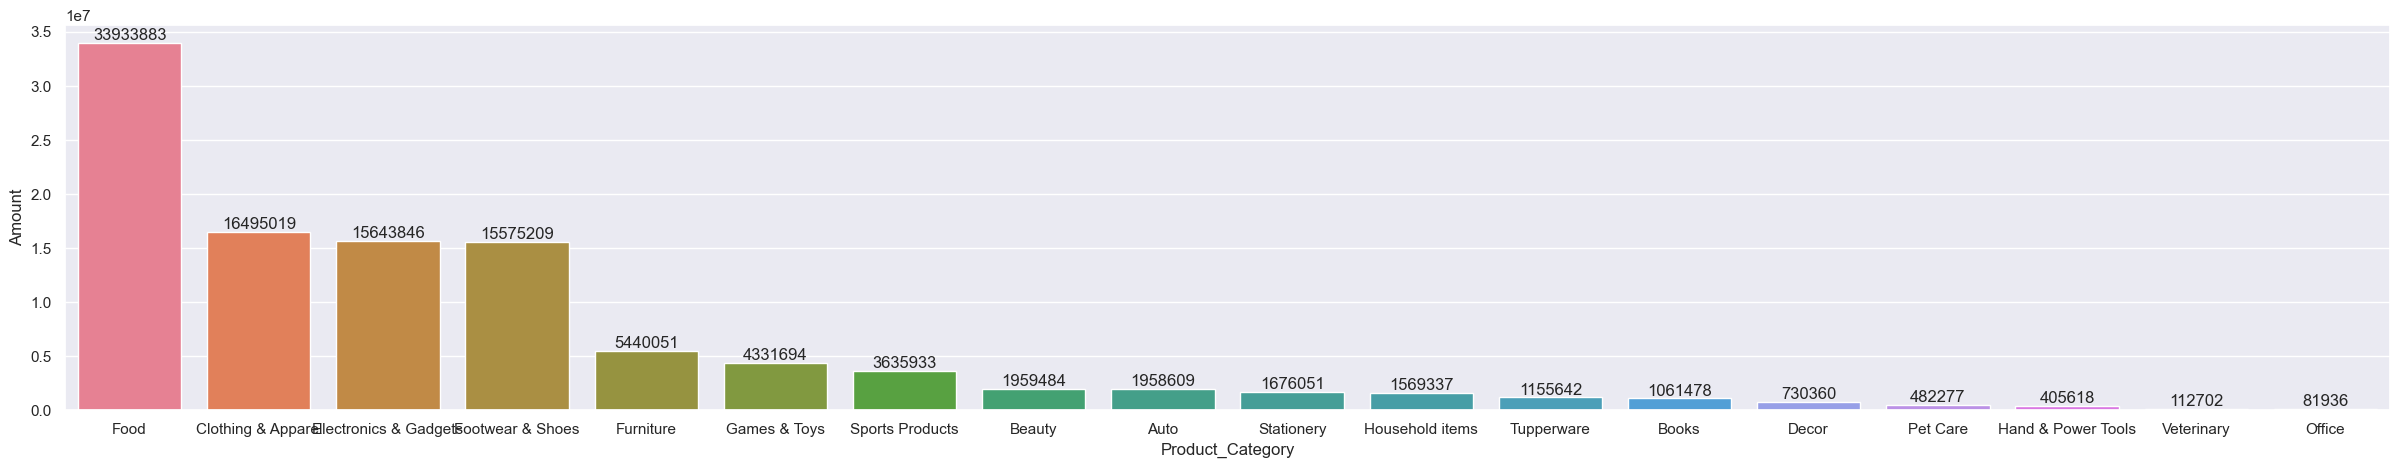

In [76]:
hx=sns.barplot(x='Product_Category',y='Amount',data=sales_ProCat,hue = 'Product_Category')
for bars in hx.containers:
    hx.bar_label(bars,labels=[f'{int(v.get_height())}'for v in bars])

<font size="5" color="pink">Insights:</font>
<br>
The store data analysis revealed key insights across various attributes. Female customers contributed significantly more to sales (₹74.3M) than males (₹31.9M), with the 26-35 age group being the highest spenders at ₹42.6M. Regionally, Uttar Pradesh led in sales (₹19.3M), followed by Maharashtra (₹14.4M), while the Central zone emerged as the top-performing region with ₹41.6M. Married customers outspent unmarried ones, contributing ₹62.1M, and the IT sector led among occupations with ₹14.8M in sales. Among product categories, Food dominated sales (₹33.9M), followed by Clothing & Apparel (₹16.5M) and Electronics (₹15.6M). These insights offer actionable data to optimize marketing and operational strategies.